In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [7]:
import tensorflow as tf

# Önceden eğitilmiş modeli yükle
model = tf.keras.models.load_model('model2.h5')  # Örnek dosya adı

In [8]:

import pandas as pd
"""
# DataFrame'i CSV dosyası olarak kaydetme
df.to_csv('ascii_map.csv', index=False)
"""
# Başka bir kod dosyasında CSV dosyasını okuma
ascii_map = pd.read_csv('mapping.csv')

1/1 [==============================] - 0s 31ms/step


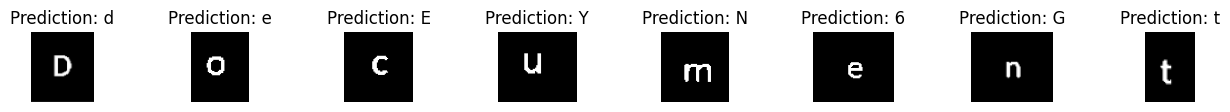

In [9]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Örnek bir model ve ascii_map varsayılan olarak tanımlanmış gibi kabul edilecektir.
# Modelin ve ascii_map'in gerçek değerleri kodunuzda tanımlanmış olmalıdır.


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

# Tahmin edilecek resimlerin listesi
#image_paths = ["test_veri/kucuk_a.png", "test_veri/kucuk_b.png", "test_veri/kucuk_e.png", "test_veri/kucuk_f.png", "test_veri/kucuk_g.PNG", "test_veri/kucuk_h.png", "test_veri/kucuk_k.PNG", "test_veri/kucuk_w.PNG", "test_veri/kucuk_y.PNG" , "test_veri/kucuk_z.png" ]
#image_paths = ["1.PNG", "2.PNG", "3.PNG", "4.PNG", "5.PNG", "6.PNG", "7.PNG", "8.PNG", ]
image_paths = ["1.PNG", "2.PNG", "3.PNG", "4.PNG", "5.PNG", "6.PNG", "7.PNG", "8.PNG"]
# Tüm resimleri yan yana göstermek için subplot kullanalım
plt.figure(figsize=(len(image_paths) * 2, 2))
for i, image_path in enumerate(image_paths):
    plt.subplot(2, len(image_paths), i + 1)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predict_image(image_path)}")
    plt.axis('off')

plt.show()


In [ ]:
# DİZİ İÇERİSİNDE BULUNAN RESİMLERLE TAHMİN 
def predict_image(component):
    img = cv2.resize(component, (28, 28))
    x = np.expand_dims(img, axis=0)  # Batch boyutunu ekleyin
    x = x / 255.0  # Normalizasyon

    cl = model.predict(x)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

components = []
# Tüm resimleri yan yana göstermek için subplot kullanalım
plt.figure(figsize=(len(components) * 2, 2))
for i, component in enumerate(components, start=1):
    plt.subplot(1, len(components), i)
    plt.imshow(component, cmap='gray')
    plt.title(f"Prediction: {predict_image(component)}")
    plt.axis('off')

plt.show()


(28, 28, 3)
1/1 [==============================] - 0s 112ms/step
Prediction :  A


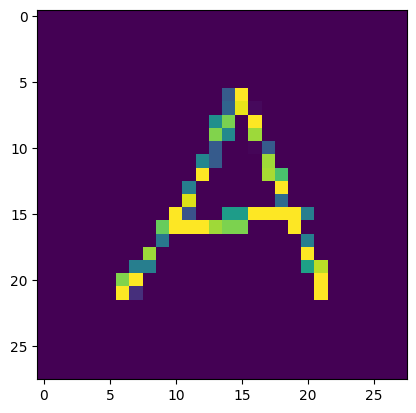

In [9]:
from keras.preprocessing import image
import cv2

img_sh_lst = []
img = image.load_img("test_veri/A.png",target_size=(28,28))
x = image.img_to_array(img)
print(x.shape)
x = x/255.0

gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
gray_image = np.expand_dims(gray_image, axis=-1)
plt.imshow(gray_image)
gray_image = np.expand_dims(gray_image, axis=0)
cl = model.predict(gray_image)
cl = list(cl[0])

print("Prediction : ",ascii_map["Character"][cl.index(max(cl))])


(28, 28, 3)
1/1 [==============================] - 0s 54ms/step
Prediction :  a


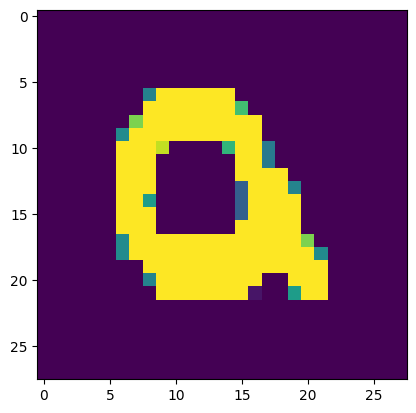

In [10]:
from keras.preprocessing import image
import cv2

img_sh_lst = []
img = image.load_img("test_veri/kucuk_a.png",target_size=(28,28))
x = image.img_to_array(img)
print(x.shape)
x = x/255.0

gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
gray_image = np.expand_dims(gray_image, axis=-1)
plt.imshow(gray_image)
gray_image = np.expand_dims(gray_image, axis=0)
cl = model.predict(gray_image)
cl = list(cl[0])

print("Prediction : ",ascii_map["Character"][cl.index(max(cl))])


GPU DENE

genellikle bir modeli eğitmek çok zaman alır, ancak aynı şey için GPU kullanırsak, aynı verileri eğitmek için zaman 10 kata kadar azalacaktır

https://www.youtube.com/watch?v=ffpderNqb3c : işe yaramadı, grafik ayarlarından vscodu ekledim sonra kaldırdım s

In [1]:
import tensorflow as tf

# TensorFlow'un kullanılabilir GPU'ları listele
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("Kullanılabilir GPU'lar:", gpus)
else:
    print("GPU bulunamadı. Lütfen driver ve CUDA ayarlarınızı kontrol edin.")


GPU bulunamadı. Lütfen driver ve CUDA ayarlarınızı kontrol edin.


In [5]:
import tensorflow as tf

# TensorFlow GPU kullanımını belirtin
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Tüm GPU'ları kullan
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Fiziksel GPU,", len(logical_gpus), "Mantıksal GPU bulunuyor")
    except RuntimeError as e:
        # Hata durumunda
        print(e)
else:
    print("GPU bulunamadı.")


GPU bulunamadı.
